In [1]:
import sys
import os
import time
import multiprocessing
import pprint 

from datetime import datetime, timedelta
import numpy as np
import matplotlib.pyplot as plt

from Packages.NoveltyDetection.setup.noveltyDetectionConfig import CONFIG
from NNNoveltyDetectionAnalysis import NNNoveltyDetectionAnalysis
from Functions.telegrambot import Bot

num_processes = multiprocessing.cpu_count()

my_bot = Bot("lisa_thebot")

# Enviroment variables
data_path = CONFIG['OUTPUTDATAPATH']
results_path = CONFIG['PACKAGE_NAME']

training_params = {
    "Technique": "NeuralNetwork",
    "DevelopmentMode": True,
    "DevelopmentEvents": 400,
    "NoveltyDetection": True,
    "InputDataConfig": {
        "database": "4classes",
        "n_pts_fft": 1024,
        "decimation_rate": 3,
        "spectrum_bins_left": 400,
        "n_windows": 1,
        "balance_data": True
    },
    "OptmizerAlgorithm": {
        "name": "Adam",
        "parameters": {
            "learning_rate": 0.001,
            "beta_1": 0.90,
            "beta_2": 0.999,
            "epsilon": 1e-08,
            "learning_decay": 1e-6,
            "momentum": 0.3,
            "nesterov": True
        }
    },
    "HyperParameters": {
        "n_folds": 4,
        "n_epochs": 200,
        "n_inits": 2,
        "batch_size": 256,
        "kernel_initializer": "uniform",
        "hidden_activation_function": "tanh", #"relu",
        "classifier_output_activation_function": "sigmoid",
        "norm": "mapstd",
        "metrics": ["accuracy"],
        "loss": "mean_squared_error",
        "dropout": False,
        "dropout_parameter": 0.0,
        "regularization": "l2",
        "regularization_parameter": 0.1
    },
    "callbacks": {
        "EarlyStopping": {
            "patience": 30,
            "monitor": "val_loss"
        }
    }
}
analysis = NNNoveltyDetectionAnalysis(parameters=training_params, model_hash="", load_hash=False, load_data=True, verbose=True)
all_data, all_trgt, all_trgt_sparse = analysis.getData()

trn_data = analysis.trn_data
trn_trgt = analysis.trn_trgt
trn_trgt_sparse = analysis.trn_trgt_sparse

models = analysis.models

Using TensorFlow backend.


Creating C:\Users\vinic\Workspace\SonarAnalysis\Results\NoveltyDetection\NeuralNetwork\outputs\788c10dbb60e2e1e917b1883a3fef35c9b74a8de4e1f96b7068d5c154bcb7ef5
Creating C:\Users\vinic\Workspace\SonarAnalysis\Results\NoveltyDetection\NeuralNetwork\outputs\788c10dbb60e2e1e917b1883a3fef35c9b74a8de4e1f96b7068d5c154bcb7ef5\AnalysisFiles
Creating C:\Users\vinic\Workspace\SonarAnalysis\Results\NoveltyDetection\NeuralNetwork\outputs\788c10dbb60e2e1e917b1883a3fef35c9b74a8de4e1f96b7068d5c154bcb7ef5\Pictures
Saving C:\Users\vinic\Workspace\SonarAnalysis\Results\NoveltyDetection\NeuralNetwork\outputs\788c10dbb60e2e1e917b1883a3fef35c9b74a8de4e1f96b7068d5c154bcb7ef5\parameters.json
[+] Time to read data file: 2.297855854034424 seconds
Qtd event of A is 12939
Qtd event of B is 29352
Qtd event of C is 11510
Qtd event of D is 23760

Biggest class is B with 29352 events
Total of events in the dataset is 77561
Balacing data...
Reading from C:\Users\vinic\Workspace\SonarAnalysis\Results\NoveltyDetection\4

In [3]:
pp = pprint.PrettyPrinter(indent=1)
print(analysis.model_hash)
print(analysis.getBaseResultsPath())
pp.pprint(analysis.parameters)

788c10dbb60e2e1e917b1883a3fef35c9b74a8de4e1f96b7068d5c154bcb7ef5
C:\Users\vinic\Workspace\SonarAnalysis\Results\NoveltyDetection\NeuralNetwork\outputs\788c10dbb60e2e1e917b1883a3fef35c9b74a8de4e1f96b7068d5c154bcb7ef5
{'DevelopmentEvents': 400,
 'DevelopmentMode': True,
 'HyperParameters': {'batch_size': 256,
                     'classifier_output_activation_function': 'sigmoid',
                     'dropout': False,
                     'dropout_parameter': 0.0,
                     'hidden_activation_function': 'tanh',
                     'kernel_initializer': 'uniform',
                     'loss': 'mean_squared_error',
                     'metrics': ['accuracy'],
                     'n_epochs': 200,
                     'n_folds': 4,
                     'n_inits': 2,
                     'norm': 'mapstd',
                     'regularization': 'l2',
                     'regularization_parameter': 0.1},
 'InputDataConfig': {'balance_data': True,
                     'database':

#### Perform the training of the model

In [4]:
trn_data = analysis.trn_data
trn_trgt = analysis.trn_trgt
trn_trgt_sparse = analysis.trn_trgt_sparse

for inovelty in range(len(analysis.class_labels)):
    startTime = time.time()
    
    analysis.train(layer=1,
                   inovelty=inovelty,
                   trainingType="normal", #foldSweep, neuronSweep, normal
                   hidden_neurons=[50],
                   neurons_variation_step=5,
                   numThreads=4,
                   model_hash=analysis.model_hash)
    
    duration = str(timedelta(seconds=float(time.time() - startTime)))
    print("The training of the model for novelty class {0} took {1} to be performed\n".format(analysis.class_labels[inovelty], duration))

python neuralnetwork_train.py --layer 1 --novelty 0 --threads 4 --type normal --hiddenNeurons 50 --neuronsVariationStep 5 --modelhash 788c10dbb60e2e1e917b1883a3fef35c9b74a8de4e1f96b7068d5c154bcb7ef5
The training of the model for novelty class A took 0:00:02.731697 to be performed

python neuralnetwork_train.py --layer 1 --novelty 1 --threads 4 --type normal --hiddenNeurons 50 --neuronsVariationStep 5 --modelhash 788c10dbb60e2e1e917b1883a3fef35c9b74a8de4e1f96b7068d5c154bcb7ef5
The training of the model for novelty class B took 0:00:00.449621 to be performed

python neuralnetwork_train.py --layer 1 --novelty 2 --threads 4 --type normal --hiddenNeurons 50 --neuronsVariationStep 5 --modelhash 788c10dbb60e2e1e917b1883a3fef35c9b74a8de4e1f96b7068d5c154bcb7ef5
The training of the model for novelty class C took 0:00:00.461765 to be performed

python neuralnetwork_train.py --layer 1 --novelty 3 --threads 4 --type normal --hiddenNeurons 50 --neuronsVariationStep 5 --modelhash 788c10dbb60e2e1e917b

In [6]:
analysis.train(layer=1,
               inovelty=inovelty,
               trainingType="normal", #foldSweep, neuronSweep, normal
               hidden_neurons=[50],
               neurons_variation_step=5,
               numThreads=4,
               model_hash=analysis.model_hash)

python neuralnetwork_train.py --layer 1 --novelty 3 --threads 4 --type normal --hiddenNeurons 50 --neuronsVariationStep 5 --modelhash 788c10dbb60e2e1e917b1883a3fef35c9b74a8de4e1f96b7068d5c154bcb7ef5


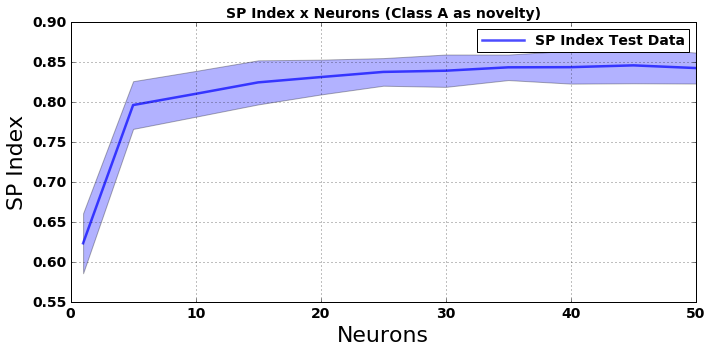

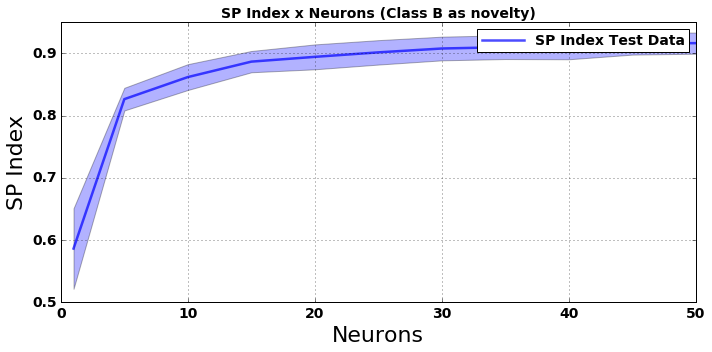

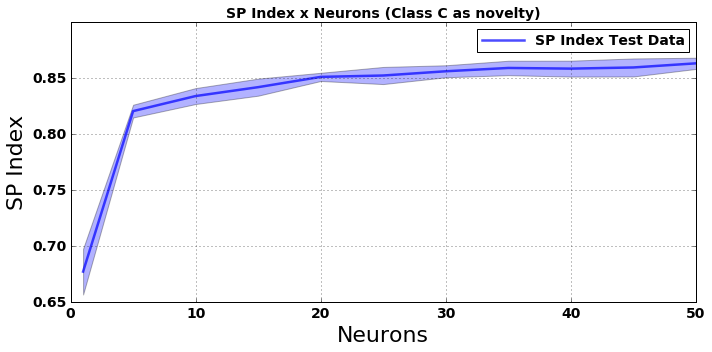

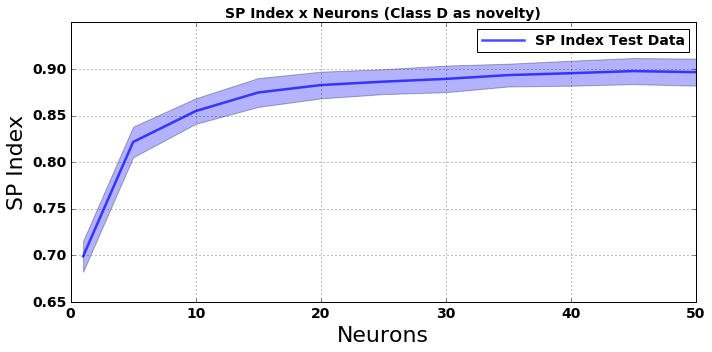

In [8]:
%matplotlib inline 

from sklearn import metrics
from sklearn import preprocessing
from sklearn.externals import joblib
from Functions.StatisticalAnalysis import KLDiv, EstPDF
import matplotlib.pyplot as plt

# Choose layer 
layer = 1

# Choose neurons topology
hidden_neurons = [50]

step = 5
neurons_mat = [1] + range(step,hidden_neurons[layer-1]+step,step)
neurons_mat = neurons_mat[:len(neurons_mat)-layer+2]

analysis_name = 'sp_index_%i_layer_keras_class_weights_v2'%(layer)
analysis_file = os.path.join(analysis.getBaseResultsPath(), "AnalysisFiles", analysis_name + ".jbl")    

verbose = True

# Plot parameters
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['legend.numpoints'] = 1
plt.rcParams['legend.handlelength'] = 3
plt.rcParams['legend.borderpad'] = 0.3
plt.rcParams['legend.fontsize'] = 14
m_colors = ['b', 'r', 'g', 'y']
figsize = (10,5)


results = {}
spIndex = np.zeros([len(analysis.class_labels), analysis.parameters["HyperParameters"]["n_folds"], len(neurons_mat)])

if not os.path.exists(analysis_file):
    for inovelty in range(len(analysis.class_labels)):
        folds = range(len(analysis.CVO[inovelty]))
        for ifold in folds:    
            class_eff_mat = np.zeros([analysis.parameters["HyperParameters"]["n_folds"],len(np.unique(all_trgt))])
            known_sp_mat = np.zeros([analysis.parameters["HyperParameters"]["n_folds"]])

            buff = np.zeros([len(np.unique(all_trgt))-1])
            class_eff = np.zeros([len(np.unique(all_trgt))], dtype=object)
            known_sp = np.zeros([len(np.unique(all_trgt))], dtype=object)

            def getSP(ineuron):
                train_id, test_id = analysis.CVO[inovelty][ifold]

                # normalize known classes
                if analysis.parameters["HyperParameters"]["norm"] == "mapstd":
                    scaler = preprocessing.StandardScaler().fit(all_data[all_trgt!=inovelty][train_id,:])
                elif analysis.parameters["HyperParameters"]["norm"] == "mapstd_rob":
                    scaler = preprocessing.RobustScaler().fit(all_data[all_trgt!=inovelty][train_id,:])
                elif analysis.parameters["HyperParameters"]["norm"] == "mapminmax":
                    scaler = preprocessing.MinMaxScaler().fit(all_data[all_trgt!=inovelty][train_id,:])

                known_data = scaler.transform(analysis.trn_data[inovelty][test_id,:])
                known_trgt = analysis.trn_trgt[inovelty][test_id]
                classifier = models[inovelty].get_model(data  = analysis.trn_data[inovelty],
                                                        trgt  = analysis.trn_trgt[inovelty], 
                                                        hidden_neurons = hidden_neurons[:layer-1]+[ineuron],
                                                        layer = layer,
                                                        ifold = ifold
                                                       )

                output = classifier.predict(known_data)

                num_known_classes = analysis.trn_trgt_sparse[inovelty].shape[1]
                thr_value = 0.2
                for iclass, class_id in enumerate(np.unique(all_trgt)):
                    if iclass == inovelty:
                        continue
                    output_of_class_events = output[known_trgt==iclass-(iclass>inovelty),:]
                    correct_class_output = np.argmax(output_of_class_events,axis=1)==iclass-(iclass>inovelty)
                    output_above_thr = output_of_class_events[correct_class_output,iclass-(iclass>inovelty)]>thr_value
                    class_eff = float(sum(output_above_thr))/float(len(output_of_class_events))
                    buff[iclass-(iclass>inovelty)] = class_eff

                sp_index = (np.sqrt(np.mean(buff,axis=0)*np.power(np.prod(buff),1./float(len(buff)))))
                
                return ineuron, sp_index

            # Start Parallel processing
            p = multiprocessing.Pool(processes=num_processes)

            if verbose:
                print '[*] Calculating SP Index ...'
            results = p.map(getSP, neurons_mat)

            for ineuron_index in range(len(neurons_mat)):
                spIndex[inovelty, ifold, neurons_mat.index(results[ineuron_index][0])] = results[ineuron_index][1]

            p.close()
            p.join()

    joblib.dump([neurons_mat,spIndex],analysis_file,compress=9)
else:
    [neurons_mat, spIndex] = joblib.load(analysis_file)

    
for inovelty in range(len(analysis.class_labels)):
    # Plot results    
    fig = plt.subplots(figsize=figsize)
    ax = plt.subplot(1,1,1)
    
    mean_sp = np.mean(spIndex[inovelty,:], axis=0)
    error_sp = np.std(spIndex[inovelty,:,:], axis=0)
    
    ax.plot(neurons_mat, mean_sp, color='b', alpha=0.7, linewidth=2.5, label='SP Index Test Data')
    
    ax.fill_between(neurons_mat, mean_sp+error_sp, mean_sp-error_sp, facecolor='blue', alpha=0.3)
    
    ax.set_title('SP Index x Neurons (Class {} as novelty)'.format(analysis.class_labels[inovelty]),
                                  fontsize=14, fontweight='bold')
    ax.set_ylabel('SP Index', fontsize=22)
    ax.set_xlabel('Neurons', fontsize=22)
    ax.grid()
    ax.legend()
    plt.tight_layout()
    #Save the figure
    neurons_str = models[inovelty].get_neurons_str(trn_data[inovelty],hidden_neurons=hidden_neurons)
    file_name = os.path.join(analysis.pictures_output_folder, analysis_name+"_{}_novelty_{}_neurons.png".format(inovelty,neurons_str))
    plt.savefig(file_name, format="png")
    try: 
        my_bot.sendMessage(imgPath=file_name)
    except Exception as e:
        print("Error when sending the image to the bot. Error: {}".format(str(e)))

### Figures-of-Merit Analysis for a threshold variation at output layer

In [ ]:
# Thresolds variation x Figures of Merit
%matplotlib inline 

from sklearn import metrics
from sklearn import preprocessing
from sklearn.externals import joblib
from Functions.StatisticalAnalysis import KLDiv, EstPDF
from Functions import FunctionsDataVisualization
import matplotlib.pyplot as plt

# Choose layer 
layer = 1

# Choose neurons topology
hidden_neurons = [50]
neurons_str = models[inovelty].get_neurons_str(trn_data[0],hidden_neurons=hidden_neurons)
analysis_name = 'figures_of_merit_{}_layer_{}_neurons'.format(layer,neurons_str)
analysis_file = os.path.join(analysis.getBaseResultsPath(), "AnalysisFiles", analysis_name + ".jbl")    

verbose = True

# Plot parameters
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['legend.numpoints'] = 1
plt.rcParams['legend.handlelength'] = 3
plt.rcParams['legend.borderpad'] = 0.3
plt.rcParams['legend.fontsize'] = 14
m_colors = ['b', 'r', 'g', 'y']
figsize = (20,15)


if not os.path.exists(analysis_file):
    thr_mat = np.round(np.arange(0.0,1.05,0.05),3)
    thr_mat[thr_mat>-0.1] = abs(thr_mat[thr_mat>-0.1])
    n_folds = analysis.parameters["HyperParameters"]["n_folds"]
    class_eff_mat = np.zeros([n_folds,len(np.unique(all_trgt)),len(np.unique(all_trgt)),len(thr_mat)])
    novelty_eff_mat = np.zeros([n_folds,len(np.unique(all_trgt)),len(thr_mat)])
    known_acc_mat = np.zeros([n_folds,len(np.unique(all_trgt)),len(thr_mat)])
    known_sp_mat = np.zeros([n_folds,len(np.unique(all_trgt)),len(thr_mat)])
    known_trig_mat = np.zeros([n_folds,len(np.unique(all_trgt)),len(thr_mat)])
    
    for inovelty, novelty_class in enumerate(np.unique(analysis.all_trgt)):
        for ifold in range(len(analysis.CVO[inovelty])):
            train_id, test_id = analysis.CVO[inovelty][ifold]
            
            print('Novelty class: %01.0f - Topology: %s - fold %i'%(novelty_class,
                                                                    models[inovelty].get_neurons_str(data=trn_data[inovelty], hidden_neurons=hidden_neurons)+'x'+str(trn_trgt_sparse[inovelty].shape[1]),
                                                                    ifold))
            classifier = models[inovelty].get_model(data=analysis.trn_data[inovelty], trgt=analysis.trn_trgt[inovelty],
                                                    hidden_neurons=hidden_neurons, layer=layer, ifold=ifold)
            
            # normalize known classes
            if analysis.parameters["HyperParameters"]["norm"] == "mapstd":
                scaler = preprocessing.StandardScaler().fit(all_data[all_trgt!=inovelty][train_id,:])
            elif analysis.parameters["HyperParameters"]["norm"] == "mapstd_rob":
                scaler = preprocessing.RobustScaler().fit(all_data[all_trgt!=inovelty][train_id,:])
            elif analysis.parameters["HyperParameters"]["norm"] == "mapminmax":
                scaler = preprocessing.MinMaxScaler().fit(all_data[all_trgt!=inovelty][train_id,:])

            known_data = scaler.transform(analysis.trn_data[inovelty][test_id,:])
            known_trgt = analysis.trn_trgt[inovelty][test_id]
            
            novelty_data = scaler.transform(all_data[all_trgt==inovelty])
            
            output = classifier.predict(known_data)
            novelty_output = classifier.predict(novelty_data)
            class_eff_mat, novelty_eff_mat, known_acc_mat, known_sp_mat, known_trig_mat, thr_mat = analysis.get_figures_of_merit(known_output=output,
                                                                                                                                 known_target=known_trgt, 
                                                                                                                                 novelty_output=novelty_output,
                                                                                                                                 thr_mat=thr_mat, 
                                                                                                                                 inovelty=inovelty,
                                                                                                                                 ifold=ifold)
    joblib.dump([class_eff_mat, novelty_eff_mat, known_acc_mat, known_sp_mat, known_trig_mat, thr_mat],
                analysis_file,compress=9)
else:
    print('file exists')
    [class_eff_mat, novelty_eff_mat, known_acc_mat, known_sp_mat, known_trig_mat, thr_mat] = joblib.load(analysis_file) 

# plot analysis
import matplotlib.pyplot as plt
%matplotlib inline  

fig = plt.subplots(figsize=figsize)

for inovelty, novelty_class in enumerate(np.unique(all_trgt)):
    ax = plt.subplot(2,2,inovelty+1)
    for iclass, m_class in enumerate(np.unique(all_trgt)):
        if novelty_class == m_class:
            #a = 0
            ax.errorbar(thr_mat,np.mean(novelty_eff_mat[:,int(novelty_class),:],axis=0),
                        np.std(novelty_eff_mat[:,int(novelty_class),:],axis=0),fmt='o-',
                        color='k',alpha=0.7,linewidth=3,
                        label='Novelty Detection')
            ax.errorbar(thr_mat,np.mean(known_acc_mat[:,int(novelty_class),:],axis=0),
                        np.std(known_acc_mat[:,int(novelty_class),:],axis=0),fmt='o--',
                        color='m',alpha=0.7,linewidth=3,
                        label='Known Accuracy')
            ax.errorbar(thr_mat,np.mean(known_sp_mat[:,int(novelty_class),:],axis=0),
                        np.std(known_sp_mat[:,int(novelty_class),:],axis=0),fmt='o:',
                        color='c',alpha=0.7,linewidth=3,
                        label='Known SP')
            ax.errorbar(thr_mat,np.mean(known_trig_mat[:,int(novelty_class),:],axis=0),
                        np.std(known_trig_mat[:,int(novelty_class),:],axis=0),fmt='o-.',
                        color='k',alpha=0.7,linewidth=3,
                        label='Known Trig.')
        else:
            ax.errorbar(thr_mat,np.mean(class_eff_mat[:,int(novelty_class),int(m_class),:],axis=0),
                        np.std(class_eff_mat[:,int(novelty_class),int(m_class),:],axis=0),fmt='o-',
                        color=m_colors[int(m_class)],alpha=0.7,linewidth=3,
                       label='Class {} Efficency'.format(analysis.getClassLabels()[iclass]))
    ax.set_xticks(thr_mat)
    ax.set_xticklabels(thr_mat,rotation=45, fontsize=18)
    ax.set_title('MLP - Class {} as Novelty - Topology {}'.format(analysis.getClassLabels()[iclass], neurons_str),fontsize=18,weight='bold')
    ax.set_xlim([np.min(thr_mat), np.max(thr_mat)])
    
    ax.set_ylim([0.0, 1.3])
    y_ticks = np.arange(0.0,1.3,0.1)
    ax.set_yticks(y_ticks)
    y_tick_labels = 100*y_ticks[y_ticks<=1.0]
    y_tick_labels = y_tick_labels.astype(int)
    ax.set_yticklabels(y_tick_labels,fontsize=18)
    
    ax.grid()
    
    if inovelty > 1:
        ax.set_xlabel('Threshold',fontsize=18,weight='bold')
    if inovelty == 0 or inovelty == 2:
        ax.set_ylabel('Figures-of-Merit (%)',fontsize=18,weight='bold')
        
    handles, labels = ax.get_legend_handles_labels()
    # sort both labels and handles by labels
    labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
    ax.legend(handles, labels, ncol=2, loc='upper center')
   
    plt.tight_layout()
    
 #Save the figure
file_name = os.path.join(analysis.pictures_output_folder, analysis_name+"_{}_novelty_{}_neurons.png".format(inovelty,neurons_str))
plt.savefig(file_name, format="png")
try: 
    my_bot.sendMessage(imgPath=file_name)
except Exception as e:
    print("Error when sending the image to the bot. Error: {}".format(str(e)))